# Q3: Conduct a customer lifetime value prediction for an insurance company.

* Student ID: p233340 
* Name: Kwok Tsz Yi
* Course: COM6101

In [88]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import dataset
df = pd.read_csv('Q3.csv')
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1.0,5.0,5790.0,More than 1,A,Platinum,64308.0
1,2,Male,Rural,High School,5L-10L,0.0,8.0,5080.0,More than 1,A,Platinum,515400.0
2,3,Male,Urban,Bachelor,5L-10L,1.0,8.0,2599.0,More than 1,A,Platinum,64212.0
3,4,Female,Rural,High School,5L-10L,0.0,7.0,0.0,More than 1,A,Platinum,97920.0
4,5,Male,Urban,High School,More than 10L,1.0,6.0,3508.0,More than 1,A,Gold,59736.0


Find the shape of the data, the data types of the columns, and the first few rows of the data.

In [89]:
df.shape

(9954, 12)

In [90]:
df.dtypes

id                  int64
gender             object
area               object
qualification      object
income             object
marital_status    float64
vintage           float64
claim_amount      float64
num_policies       object
policy             object
type_of_policy     object
cltv              float64
dtype: object

### Handling the missing values

In [91]:
df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            1
marital_status    1
vintage           1
claim_amount      1
num_policies      1
policy            1
type_of_policy    1
cltv              2
dtype: int64

As the number of missing values is small, we can drop the rows with missing values.

In [92]:
df = df.dropna()
df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [93]:
# drop the column 'id' as this is not useful for the analysis
df = df.drop(['id'], axis=1)

## Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation with CLTV \n')

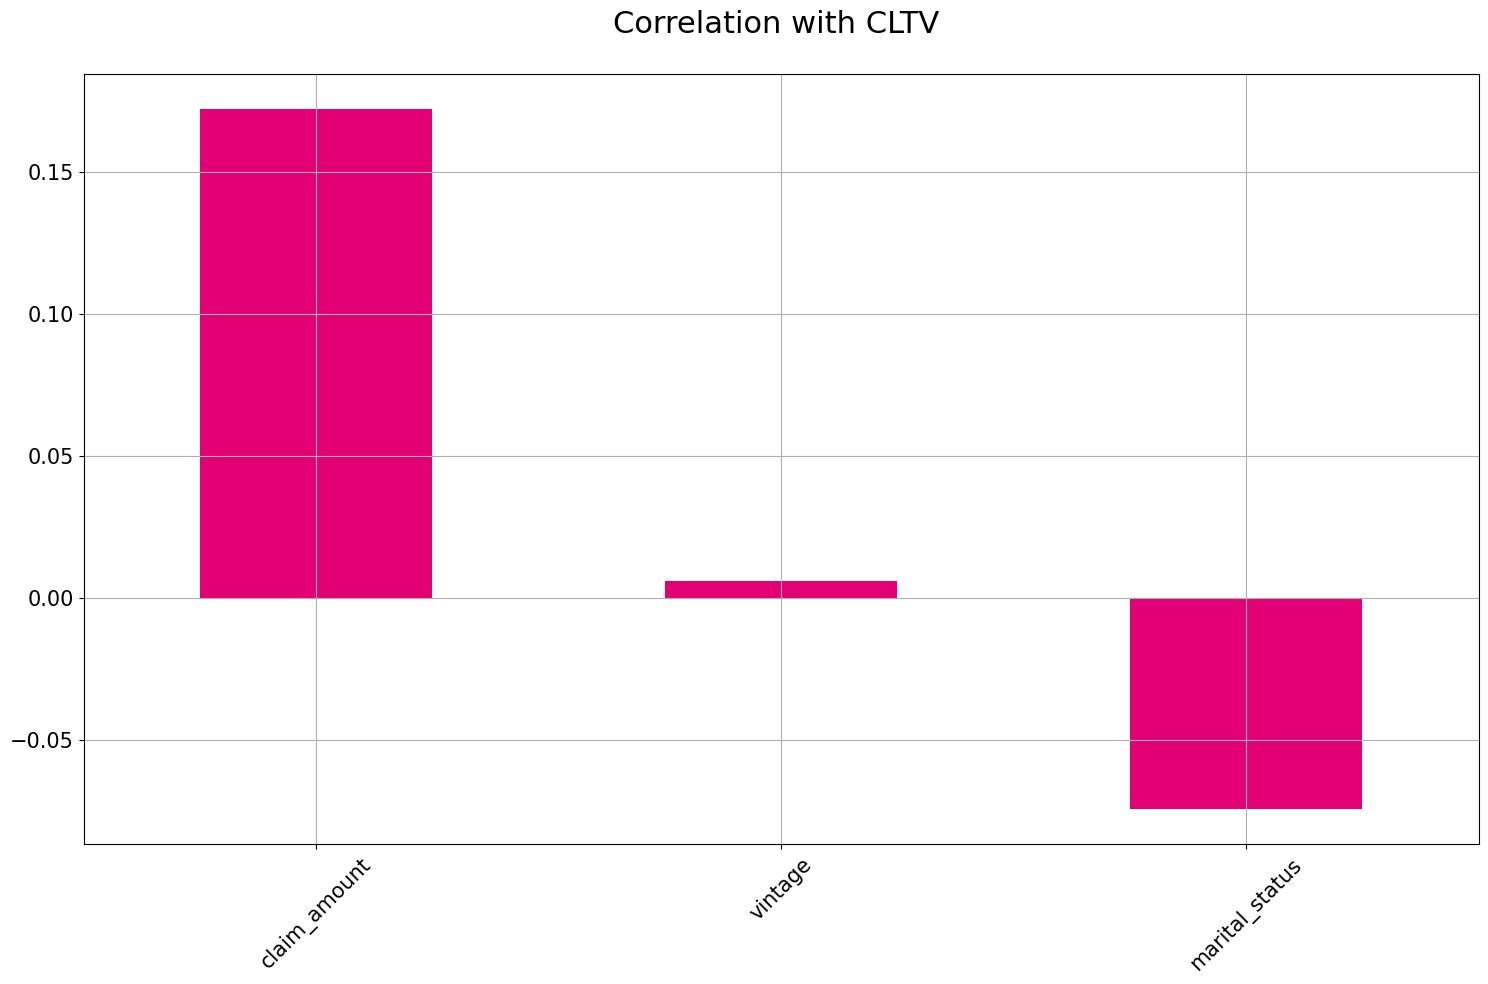

In [94]:
# correlation of numerical columns with cltv
# Correlation between churn and selected boolean and numeric variables
plt.figure(6)

correlations = df.select_dtypes(include = ['float64', 'int64']).corr()['cltv'].sort_values(ascending = False)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#e20074',
        rot = 45, grid = True)

plt.title('Correlation with CLTV \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

## Data Preprocessing

In [95]:
df.dtypes

gender             object
area               object
qualification      object
income             object
marital_status    float64
vintage           float64
claim_amount      float64
num_policies       object
policy             object
type_of_policy     object
cltv              float64
dtype: object

As per the dtype, there are 6 columns need to be transformed to numerical data type. For column gender, area, policy and qualification, as they are non-ordinal categorical data, we can use one-hot encoding to transform them. For column income, num_policies and type_of_policy, as they are ordinal categorical data, we can use label encoding to transform them.

#### One-hot encoding

Columns to perform one-hot encoding:
* gender
* area
* policy
* qualification

In [96]:
# replace df['gender'] with dummy variables
df = df.join(pd.get_dummies(df['gender']))
df = df.join(pd.get_dummies(df['area']))
df = df.join(pd.get_dummies(df['policy']))
df = df.join(pd.get_dummies(df['qualification']))
df = df.drop(['gender', 'area', 'policy', 'qualification'], axis=1)
df.head()

,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv,Female,Male,Rural,Urban,A,B,C,D,Bachelor,High School,Others
0,5L-10L,1.0,5.0,5790.0,More than 1,Platinum,64308.0,False,True,False,True,True,False,False,False,True,False,False
1,5L-10L,0.0,8.0,5080.0,More than 1,Platinum,515400.0,False,True,True,False,True,False,False,False,False,True,False
2,5L-10L,1.0,8.0,2599.0,More than 1,Platinum,64212.0,False,True,False,True,True,False,False,False,True,False,False
3,5L-10L,0.0,7.0,0.0,More than 1,Platinum,97920.0,True,False,True,False,True,False,False,False,False,True,False
4,More than 10L,1.0,6.0,3508.0,More than 1,Gold,59736.0,False,True,False,True,True,False,False,False,False,True,False


In [97]:
# transform boolean to int
for i in range(0, len(df.columns)):
    if df.iloc[:, i].dtype == bool:
        df.iloc[:, i] = df.iloc[:, i].astype(int)
df.dtypes

income             object
marital_status    float64
vintage           float64
claim_amount      float64
num_policies       object
type_of_policy     object
cltv              float64
Female              int32
Male                int32
Rural               int32
Urban               int32
A                   int32
B                   int32
C                   int32
D                   int32
Bachelor            int32
High School         int32
Others              int32
dtype: object

In [98]:
df.head()

,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv,Female,Male,Rural,Urban,A,B,C,D,Bachelor,High School,Others
0,5L-10L,1.0,5.0,5790.0,More than 1,Platinum,64308.0,0,1,0,1,1,0,0,0,1,0,0
1,5L-10L,0.0,8.0,5080.0,More than 1,Platinum,515400.0,0,1,1,0,1,0,0,0,0,1,0
2,5L-10L,1.0,8.0,2599.0,More than 1,Platinum,64212.0,0,1,0,1,1,0,0,0,1,0,0
3,5L-10L,0.0,7.0,0.0,More than 1,Platinum,97920.0,1,0,1,0,1,0,0,0,0,1,0
4,More than 10L,1.0,6.0,3508.0,More than 1,Gold,59736.0,0,1,0,1,1,0,0,0,0,1,0


#### Ordinal encoding

In [99]:
# transform type_of_policy to numeric
# display value_counts
df['type_of_policy'].value_counts()

type_of_policy
Platinum    5395
Gold        2285
Silver      2272
Name: count, dtype: int64

In [100]:
# silver = 0, gold = 1, platinum = 2
df['type_of_policy'] = df['type_of_policy'].map({'Silver': 0, 'Gold': 1, 'Platinum': 2})
df['type_of_policy'].value_counts()

type_of_policy
2    5395
1    2285
0    2272
Name: count, dtype: int64

In [101]:
# transform num_policies to numeric 
# display value_counts
df['num_policies'].value_counts()

num_policies
More than 1    6719
1              3233
Name: count, dtype: int64

In [102]:
# map more than 1 policy to 1, 1 policy to 0
df['num_policies'] = df['num_policies'].map({'1': 0, 'More than 1':1})
df['num_policies'].value_counts()

num_policies
1    6719
0    3233
Name: count, dtype: int64

In [103]:
# transform income column to numeric
# discover unique values in income column first
df['income'].value_counts()

income
5L-10L           5797
2L-5L            2417
More than 10L    1507
<=2L              231
Name: count, dtype: int64

Encoding the df['income'] column to numerical data type, e.g. '<=2L' to 1, '2L-5L' to 2.

In [104]:
# encode income column
df['income'] = df['income'].map({'<=2L': 0, '2L-5L': 1, '5L-10L': 2, 'More than 10L': 3})
df['income'].value_counts()

income
2    5797
1    2417
3    1507
0     231
Name: count, dtype: int64

In [105]:
# rearrange columns: cltv to the end
cols = list(df.columns)
cols.remove('cltv')
cols.append('cltv')
df = df[cols]
df.head()

,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,Female,Male,Rural,Urban,A,B,C,D,Bachelor,High School,Others,cltv
0,2,1.0,5.0,5790.0,1,2,0,1,0,1,1,0,0,0,1,0,0,64308.0
1,2,0.0,8.0,5080.0,1,2,0,1,1,0,1,0,0,0,0,1,0,515400.0
2,2,1.0,8.0,2599.0,1,2,0,1,0,1,1,0,0,0,1,0,0,64212.0
3,2,0.0,7.0,0.0,1,2,1,0,1,0,1,0,0,0,0,1,0,97920.0
4,3,1.0,6.0,3508.0,1,1,0,1,0,1,1,0,0,0,0,1,0,59736.0


### Outlier detection and removal:

We can use the z score to detect the outliers. If the z score is greater than 3, we can remove the outliers, as per the normal distribution, 99.7% of the data should be within 3 standard deviations from the mean.

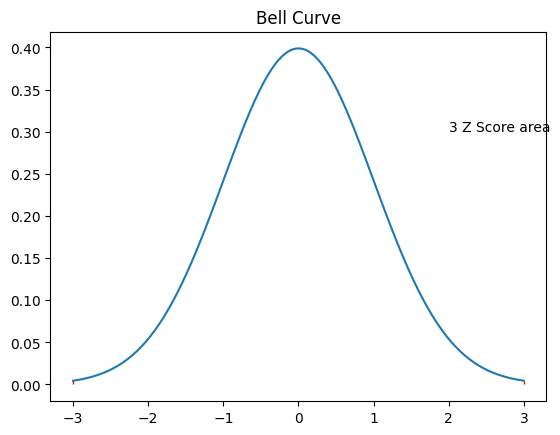

In [106]:
# use a bell curve to visualize the concept of 3 z score of normal distribution
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# red area as abs z score > 3
plt.fill_between(x, 0, stats.norm.pdf(x, mu, sigma), where = abs(x) >= 3, color = 'red')
# label the red area
plt.text(2, 0.3, '3 Z Score area', fontsize = 10)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Bell Curve')
plt.show()

In [107]:
# remove outliers in which z > 3
from scipy.stats import zscore
z = np.abs(zscore(df))
# threshold = 3
threshold = 3
df = df[(z < 3).all(axis=1)]
df.shape

(8367, 18)

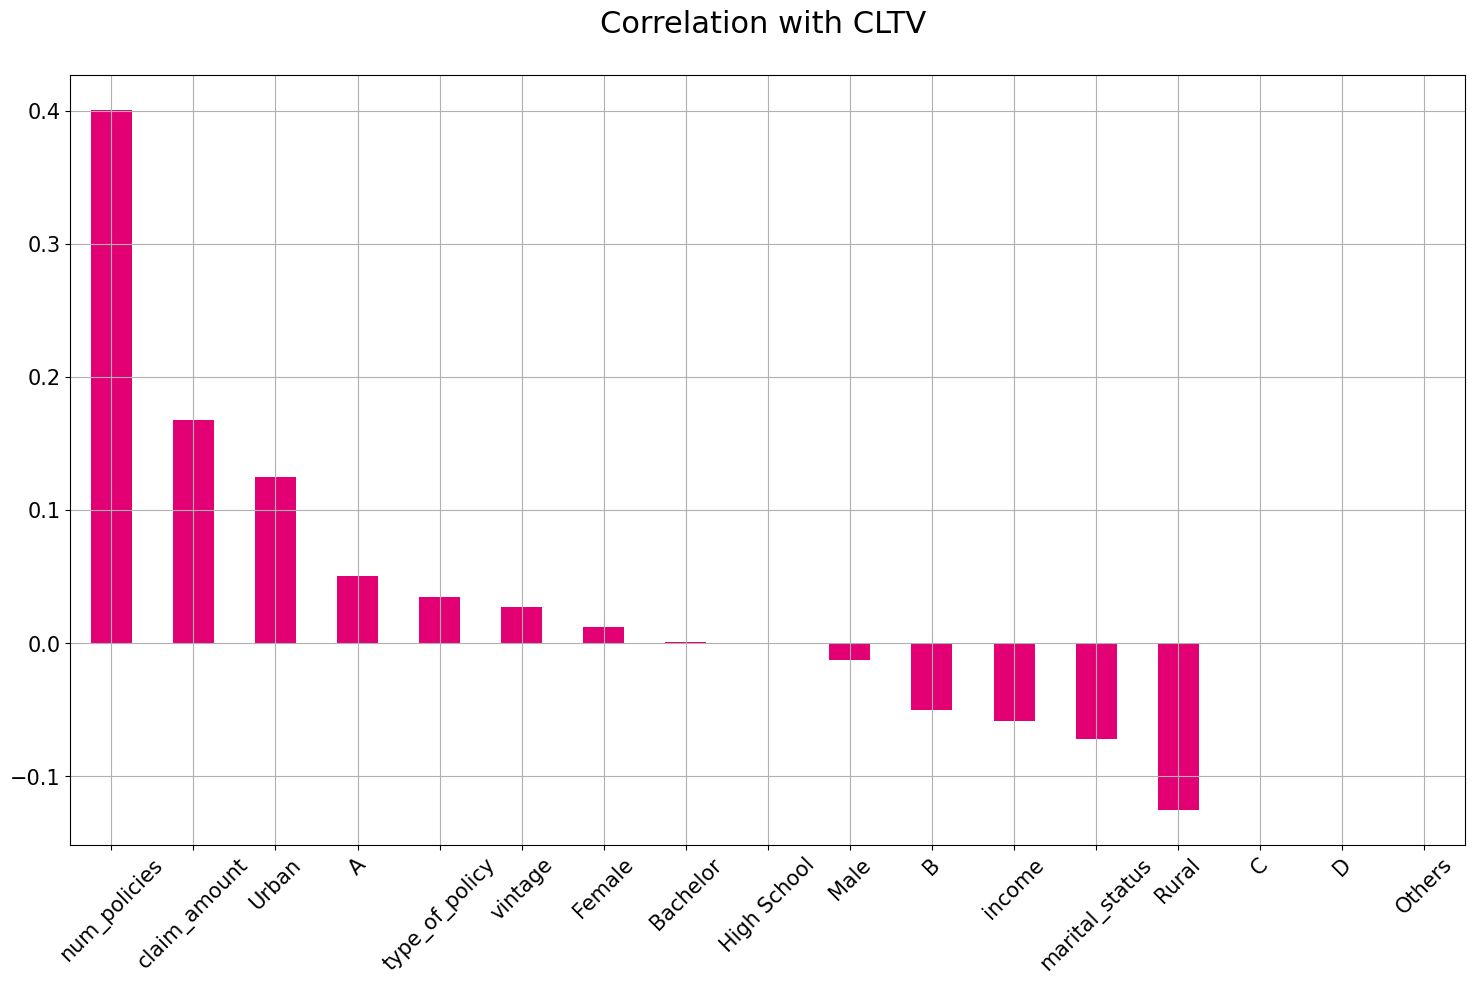

In [108]:
# correlation of numerical columns with cltv
# Correlation between churn and selected boolean and numeric variables
plt.figure(6)

correlations = df.select_dtypes(include = ['float64', 'int64', 'int32']).corr()['cltv'].sort_values(ascending = False)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#e20074',
        rot = 45, grid = True)

plt.title('Correlation with CLTV \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.show()

As per the correlation analysis of numerical columns, column 'Bachelor', 'High School', 'C', 'D' and 'Others' have nearly no correlation with the target column 'cltv'. We can consider to remove these columns from generating the linear regression model of predicting the cltv.

In [109]:
df = df.drop(['Bachelor', 'High School', 'C', 'D', 'Others'], axis = 1)

In [110]:
# Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
# Calculating Variable Inflation Factors
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["Variable Inflation Factors"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

calculate_vif(df.iloc[:, :-1])

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,Variable Inflation Factors
0,income,1.102359
1,marital_status,1.026743
2,vintage,1.012656
3,claim_amount,1.381137
4,num_policies,1.038719
5,type_of_policy,1.013380
6,Female,inf
7,Male,inf
8,Rural,inf
9,Urban,inf


As per the multicollearity analysis of numerical columns, column 'Rural' & 'Urban', 'A' & 'B'. 'Female' & 'Male' have high correlation. We can consider to remove one of the columns from each pair to avoid multicollinearity.

In [111]:
df = df.drop(['Rural', 'A', 'Female'], axis = 1)

In [112]:
calculate_vif(df.iloc[:, :-1])

,variables,Variable Inflation Factors
0,income,5.523061
1,marital_status,2.283525
2,vintage,4.615478
3,claim_amount,3.961098
4,num_policies,3.050275
5,type_of_policy,3.425268
6,Male,2.242019
7,Urban,4.112689
8,B,1.461299


## Predict customer lifetime value via linear regression models

In [113]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In order to predict the customer lifetime value, we can use the linear regression model to predict the cltv. We can use the train_test_split to split the data into training and testing data. We can use the training data to train the model and use the testing data to evaluate the model.

In [114]:
X = df.iloc[:, :-1] # X is the feature attributes
y = df.iloc[:, -1] # y is cltv, the target variable

# split data into train and test, test size = 0.3, random_state = 40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

### Model 1: Simple linear regression model

In [115]:
# train a simple linear regression model
linear = LinearRegression()
linear.fit(X_train, y_train)

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

LinearRegression()

In [116]:
#MSE and R2
y_pred_1 = linear.predict(X_test)
mse_insample_1 = mean_squared_error(y_train, linear.predict(X_train))
mse_outsample_1 = mean_squared_error(y_test, y_pred_1)
r2_insample_1 = r2_score(y_train, linear.predict(X_train))
r2_outsample_1 = r2_score(y_test, y_pred_1)

print('MSE in-sample:', mse_insample_1)
print('MSE out-sample:', mse_outsample_1)
print('R2 in-sample:', r2_insample_1)
print('R2 out-sample:', r2_outsample_1)

MSE in-sample: 3316216289.8726454
MSE out-sample: 3735366623.9683766
R2 in-sample: 0.177452007563367
R2 out-sample: 0.17569013427933222


C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Text(0.5, 1.0, 'Actual vs Predicted')

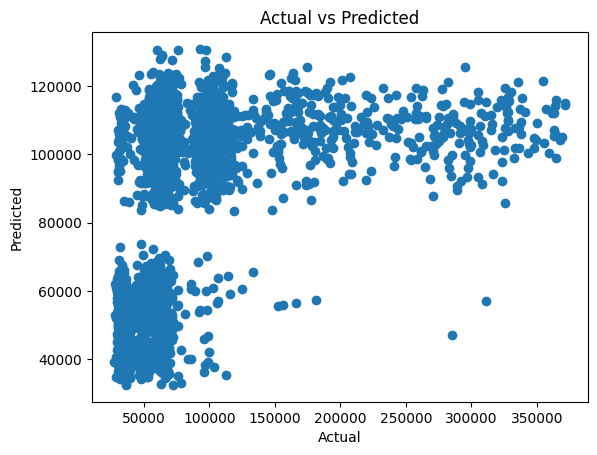

In [117]:
# plot the predicted vs actual values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

### Model 2: Bayesian Ridge Regression model

In [118]:
# bayesian ridge regression
from sklearn.linear_model import BayesianRidge
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

BayesianRidge()

In [119]:
#MSE and R2
y_pred_2 = bayesian.predict(X_test)
mse_insample_2 = mean_squared_error(y_train, bayesian.predict(X_train))
mse_outsample_2 = mean_squared_error(y_test, y_pred_2)
r2_insample_2 = r2_score(y_train, bayesian.predict(X_train))
r2_outsample_2 = r2_score(y_test, y_pred_2)

print('MSE in-sample:', mse_insample_2)
print('MSE out-sample:', mse_outsample_2)
print('R2 in-sample:', r2_insample_2)
print('R2 out-sample:', r2_outsample_2)

MSE in-sample: 3905358802.3011436
MSE out-sample: 4433763850.143909
R2 in-sample: 0.031322217315051915
R2 out-sample: 0.021569861309491123


C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Text(0.5, 1.0, 'Actual vs Predicted')

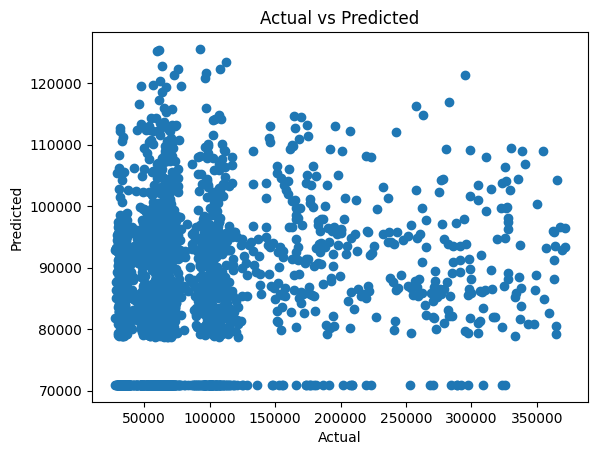

In [120]:
# plot the predicted vs actual values
plt.scatter(y_test, y_pred_2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

### Model 3: Lasso regression model

In [121]:
# lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Lasso(alpha=0.1)

In [122]:
# MSE and R2
y_pred_3 = lasso.predict(X_test)
mse_insample_3 = mean_squared_error(y_train, lasso.predict(X_train))
mse_outsample_3 = mean_squared_error(y_test, y_pred_3)
r2_insample_3 = r2_score(y_train, lasso.predict(X_train))
r2_outsample_3 = r2_score(y_test, y_pred_3)

print('MSE in-sample:', mse_insample_3)
print('MSE out-sample:', mse_outsample_3)
print('R2 in-sample:', r2_insample_3)
print('R2 out-sample:', r2_outsample_3)

MSE in-sample: 3316216290.1101637
MSE out-sample: 3735367195.225251
R2 in-sample: 0.17745200750445345
R2 out-sample: 0.17569000821602299


C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Text(0, 0.5, 'Predicted')

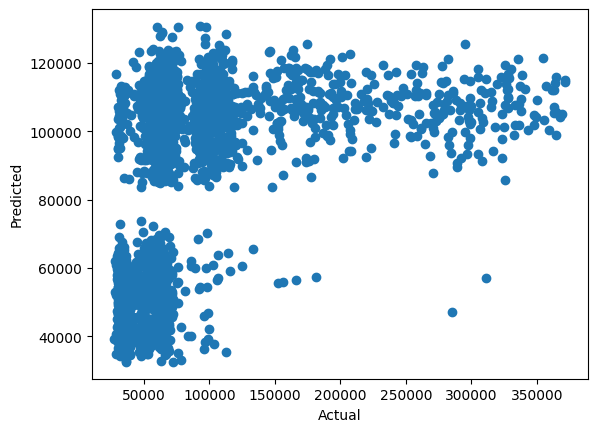

In [123]:
# plot the predicted vs actual values
plt.scatter(y_test, y_pred_3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Model 4: Ridge regression model

In [128]:
# ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

TypeError: solve() got an unexpected keyword argument 'sym_pos'

In [129]:
# MSE and R2
y_pred_4 = ridge.predict(X_test)
mse_insample_4 = mean_squared_error(y_train, ridge.predict(X_train))
mse_outsample_4 = mean_squared_error(y_test, y_pred_4)
r2_insample_4 = r2_score(y_train, ridge.predict(X_train))
r2_outsample_4 = r2_score(y_test, y_pred_4)

print('MSE in-sample:', mse_insample_4)
print('MSE out-sample:', mse_outsample_4)
print('R2 in-sample:', r2_insample_4)
print('R2 out-sample:', r2_outsample_4)

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

AttributeError: 'Ridge' object has no attribute 'coef_'

In [130]:
# plot the predicted vs actual values
plt.scatter(y_test, y_pred_4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

NameError: name 'y_pred_4' is not defined

### Model 5: Polynomial Regression model

In [131]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [132]:
# train a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [133]:
# MSE and R2
y_pred_5 = poly_reg.predict(X_test_poly)
mse_insample_5 = mean_squared_error(y_train, poly_reg.predict(X_train_poly))
mse_outsample_5 = mean_squared_error(y_test, y_pred_5)
r2_insample_5 = r2_score(y_train, poly_reg.predict(X_train_poly))
r2_outsample_5 = r2_score(y_test, y_pred_5)

print('MSE in-sample:', mse_insample_5)
print('MSE out-sample:', mse_outsample_5)
print('R2 in-sample:', r2_insample_5)
print('R2 out-sample:', r2_outsample_5)

MSE in-sample: 3267729368.3738885
MSE out-sample: 3745647352.809552
R2 in-sample: 0.18947861151559797
R2 out-sample: 0.1734214128756011


Text(0.5, 1.0, 'Actual vs Predicted')

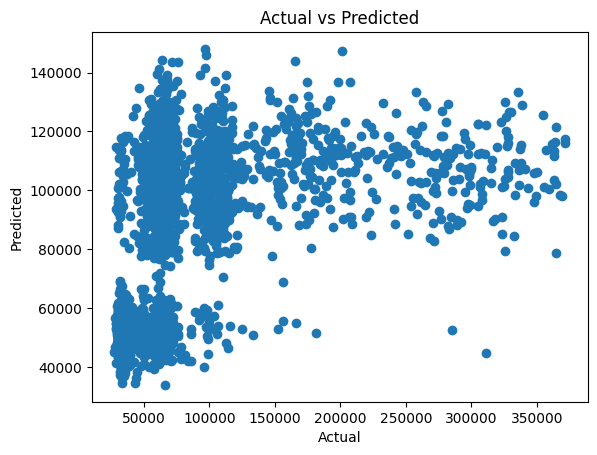

In [134]:
# plot the predicted vs actual values
plt.scatter(y_test, y_pred_5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

## Model evaluation

By using the mean squared error, we can compare the model performance of different types of linear regression models, including:
* Model 1: Simple linear regression model
* Model 2: Bayesian Ridge Regression model
* Model 3: Lasso regression model
* Model 4: Ridge regression model
* Model 5: Polynomial Regression model

In [124]:
# rank the models based on R2 out-sample
r2_outsample = [r2_outsample_1, r2_outsample_2, r2_outsample_3, r2_outsample_4, r2_outsample_5]
r2_insample = [r2_insample_1, r2_insample_2, r2_insample_3, r2_insample_4, r2_insample_5]
models = ['Linear', 'Bayesian', 'Lasso', 'Ridge', 'Polynomial']
barWidth = 0.3
r1 = np.arange(len(r2_outsample))
r2 = [x + barWidth for x in r1]
plt.bar(r1, r2_outsample, color = 'blue', width = barWidth, edgecolor = 'grey', label = 'R2 out-sample')
plt.bar(r2, r2_insample, color = 'orange', width = barWidth, edgecolor = 'grey', label = 'R2 in-sample')
plt.xlabel('Models', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(r2_outsample))], models)
plt.title('R2 out-sample vs R2 in-sample')
plt.legend()
plt.show()


,Model,R2_out,R2_in
0,Linear,0.17569,0.177452
2,Lasso,0.17569,0.177452
1,Gradient Boosting,0.02157,0.031322


As per the out of sample R-squared score, we can observe that 

In [125]:
# coefficients of the Gradient Boosting model
coef = pd.DataFrame(list(zip(X, gb.coef_)))
coef.columns = ['feature', 'coef']
gb.c

AttributeError: 'GradientBoostingRegressor' object has no attribute 'coef_'